# Biometric System Scores Errors

## Libraries Import

In [1]:
import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat

## Configuration

In [2]:
DATASETS_FOLDER = "datasets/matlab_biometric_results/"
GMS_DATASET = DATASETS_FOLDER + "gms.mat"
IMS_DATASET = DATASETS_FOLDER + "ims.mat"
PLOTS_SAMPLES_COUNT = 1000

## Data Import

In [3]:
gms_dataset = loadmat(GMS_DATASET)["gms"]
ims_dataset = loadmat(IMS_DATASET)["ims"]

In [4]:
gms_dataset = [entry[0] for entry in gms_dataset]
ims_dataset = [entry[0] for entry in ims_dataset]

## Computation of Mean and Standard Deviation

In [5]:
gms_mean = np.mean(gms_dataset)
gms_std = np.std(gms_dataset)
ims_mean = np.mean(ims_dataset)
ims_std = np.std(ims_dataset)

print("[+] For GMS dataset, the mean is {:.2f} and the deviation {:.2f}.".format(gms_mean, gms_std))
print("[+] For IMS dataset, the mean is {:.2f} and the deviation {:.2f}.".format(ims_mean, ims_std))

[+] For GMS dataset, the mean is 0.63 and the deviation 0.14.
[+] For IMS dataset, the mean is 0.29 and the deviation 0.06.


## Histogram for GMS and IMS

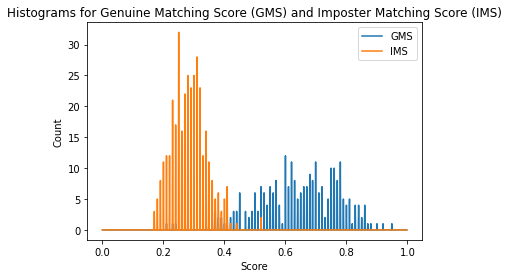

In [6]:
gms_histogram = np.histogram(gms_dataset, bins=np.arange(0, 1, 1 / PLOTS_SAMPLES_COUNT))
gms_histogram = [{"score": score, "count": count} for score, count in zip(gms_histogram[1], gms_histogram[0])]
sns.lineplot(data=pd.DataFrame(gms_histogram), x="score", y="count", label="GMS")

ims_histogram = np.histogram(ims_dataset, bins=np.arange(0, 1, 1 / PLOTS_SAMPLES_COUNT))
ims_histogram = [{"score": score, "count": count} for score, count in zip(ims_histogram[1], ims_histogram[0])]
sns.lineplot(data=pd.DataFrame(ims_histogram), x="score", y="count", label="IMS")

pyplot.xlabel("Score")
pyplot.ylabel("Count")
pyplot.title("Histograms for Genuine Matching Score (GMS) and Imposter Matching Score (IMS)")
pyplot.show()

## FMR, FNMR and DET Curves

In [7]:
fmr = [{"threshold": threshold, "fmr": len([elem for elem in ims_dataset if elem >= threshold])} for threshold in np.arange(0, 1, 1 / PLOTS_SAMPLES_COUNT)]
fnmr = [{"threshold": threshold, "fnmr": len([elem for elem in gms_dataset if elem < threshold])} for threshold in np.arange(0, 1, 1 / PLOTS_SAMPLES_COUNT)]
det = [{"fmr": fmr_elem["fmr"], "fnmr": fnmr_elem["fnmr"]} for fmr_elem, fnmr_elem in zip(fmr, fnmr)]

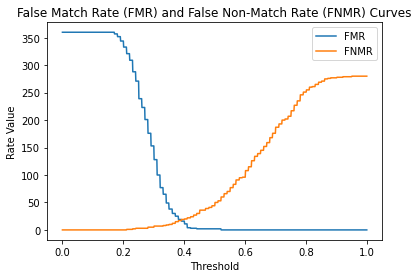

In [8]:
sns.lineplot(data=pd.DataFrame(fmr), x="threshold", y="fmr", label="FMR")
sns.lineplot(data=pd.DataFrame(fnmr), x="threshold", y="fnmr", label="FNMR")

pyplot.xlabel("Threshold")
pyplot.ylabel("Rate Value")
pyplot.title("False Match Rate (FMR) and False Non-Match Rate (FNMR) Curves")
pyplot.show()

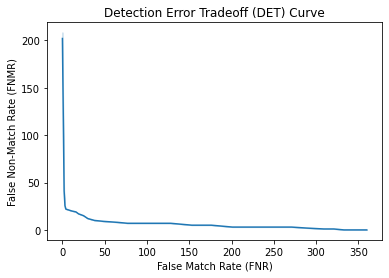

In [9]:
sns.lineplot(data=pd.DataFrame(det), x="fmr", y="fnmr")
pyplot.xlabel("False Match Rate (FNR)")
pyplot.ylabel("False Non-Match Rate (FNMR)")
pyplot.title("Detection Error Tradeoff (DET) Curve")
pyplot.show()